## DATA 690 Homework 4 (100 points - Due on Tuesday, March 26th by 11:59 pm ET)

The output of this assignment for submission should be in PDF format **AND** .py or .ipynb. 

The name of the file should be as follows: 

    Lastname_Firstname_Homework4.pdf (example: Thomas_Sunela_Homework4.pdf)
   **AND** 
    Lastname_Firstname_Homework4.ipynb (example: Thomas_Sunela_Homework4.ipynb)
    
In short, you are submitting the python notebook as well as the pdf of that notebook in **ONE** submission. 
Do **NOT** submit .html file, the system will give you an error.

    
**Incorrect file name will cost you points!<br>**

Instructions for converting a Jupyter Python notebook to PDF: 
                                        
    Go to the menu and choose, File --> Download As --> html. 
    Open that html file and print it to PDF. 
    Submit the PDF file **NOT** the html file.

If you are using Google Colab, remember to review the PDF before submitting to ensure that all cells and answers are displayed in the PDF.

**Things to note:**

* Each cell should display an output
* Use both Markdown and code comments in the Jupyter Notebook as needed

### IF YOU ARE MAKING ANY ASSUMPTIONS, WRITE THAT IN A MARKDOWN CELL OR COMMENT
### $\color{red}{\text{Answer the questions asked as well, not just code}}$. Answer the questions asked in a separate markdown cell



In this Homework assignment, you will be using techniques you learned to clean-up and analyze the data. A survey was performed to collect various body measurements and characteristics from a sample of individuals.

Why does the data need to be cleaned? In spite of the clear instructions given, it seems that some of the responses provided can't possibly be right. Many data scientists will tell you that easily more than 50% of your time is spent cleaning, preparing, and validating data. This activity will give you an opportunity to turn the messy survey responses into a useful data set from which you can extract meaningful insights.

The data has been loaded for you in the cell below.

In [84]:
# Import libraries and data

import pandas as pd
%matplotlib inline

body_data = pd.read_csv('class_survey_body_measurements.csv')
col_names = ['timestamp', 'sex', 'handspan', 'height', 
             'shoe_size','hair_color', 'mother_height', 'mother_shoe_size',
             'mother_hair_color', 'father_height', 'father_shoe_size',
             'father_hair_color','athlete','shoulder_width','skull_circum']
body_data.columns = col_names
body_data.head()

,timestamp,sex,handspan,height,shoe_size,hair_color,mother_height,mother_shoe_size,mother_hair_color,father_height,father_shoe_size,father_hair_color,athlete,shoulder_width,skull_circum
0,9/20/2018 12:21,Male,7.75,NaN,9.5,Black,63.0,7.0,Brown,69.0,10.5,Black,No,18.00,22.25
1,9/20/2018 18:43,Male,8.50,67.00,8.5,Blonde,62.0,6.0,Brown,74.0,11.0,Blonde,Yes,16.00,24.00
2,9/20/2018 18:53,Female,7.00,62.00,7.0,Black,61.0,6.0,Black,65.0,9.0,Black,Yes,15.00,22.00
3,9/20/2018 20:13,Male,8.00,68.25,9.0,Brown,58.0,NaN,Blonde,70.0,10.0,Black,No,17.25,21.75
4,9/20/2018 20:31,NaN,10.00,71.00,11.0,Black,NaN,9.0,Black,NaN,11.0,Black,No,19.00,22.00


### Problem 1: (3 points)

<span  style="color:purple; font-size:16px">Create a scatterplot of `height` (y-axis) versus `handspan` (x-axis). What do you think of the plot?</span>

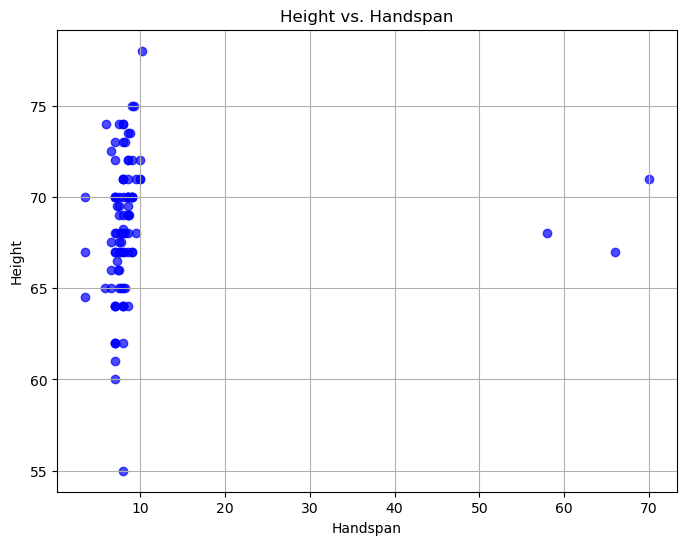

In [51]:
# Answer
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(body_data['handspan'], body_data['height'], color='blue', alpha=0.7)
plt.title('Height vs. Handspan')
plt.xlabel('Handspan')
plt.ylabel('Height')
plt.grid(True)
plt.show()

#### Written Answer:
For most heights, the majority of handspans are below 10 inches.

### Problem 2: (3 points)

<span  style="color:purple; font-size:16px">Set observations where `handspan` is greater than 30 or less than 4 to be missing using `pd.np.nan`. (Hint: Create a Boolean filter for the observations you want to remove. Extract the index for these observations and then using the `.loc[]` method, set the `handspan` values for these observations to `pd.np.nan`, the Numpy value that represents missing values.</span>

In [52]:
# Answer
import pandas as pd
import numpy as np
# Filtering the observations where handspan is greater than 30 or less than 4
filter_data = (body_data['handspan'] > 30) | (body_data['handspan'] < 4)

# Extracting the index for these observations
indices_to_replace = body_data[filter_data].index

# Setting handspan values for these observations to np.nan
body_data.loc[indices_to_replace, 'handspan'] = np.nan

print(body_data.head())

         timestamp     sex  handspan  height  shoe_size hair_color  \
0  9/20/2018 12:21    Male      7.75     NaN        9.5      Black   
1  9/20/2018 18:43    Male      8.50   67.00        8.5     Blonde   
2  9/20/2018 18:53  Female      7.00   62.00        7.0      Black   
3  9/20/2018 20:13    Male      8.00   68.25        9.0      Brown   
4  9/20/2018 20:31     NaN     10.00   71.00       11.0      Black   

   mother_height  mother_shoe_size mother_hair_color  father_height  \
0           63.0               7.0             Brown           69.0   
1           62.0               6.0             Brown           74.0   
2           61.0               6.0             Black           65.0   
3           58.0               NaN            Blonde           70.0   
4            NaN               9.0             Black            NaN   

   father_shoe_size father_hair_color athlete  shoulder_width  skull_circum  
0              10.5             Black      No           18.00         22.2

### Problem 3: (3 points)

<span  style="color:purple; font-size:16px">Re-create the scatterplot of `height` (x-axis) versus `handspan` (y-axis) now that you have removed the problem observations. Describe the resulting relationship between an individual's `handspan` and their `height`. Make sure to address the form, strength, and direction of the relationship.</span>

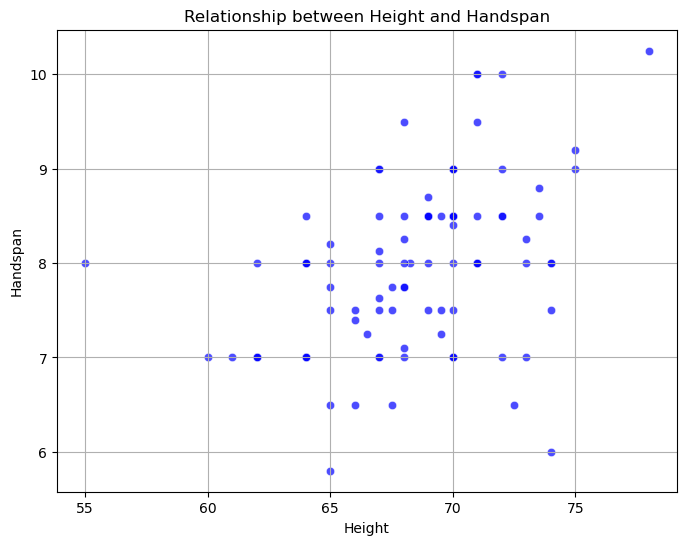

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=body_data, x='height', y='handspan', color='blue', alpha=0.7)

# Adding labels and title
plt.title('Relationship between Height and Handspan')
plt.xlabel('Height')
plt.ylabel('Handspan')
plt.grid(True)
# plot
plt.show()

#### Written Response:

Form: From the scatterplot, we can observe a general positive trend. As height increases, handspan tends to increase as well, although not perfectly linearly. The points on the scatterplot appear to follow a rough upward-sloping pattern.

Strength: The relationship between height and handspan seems to be moderately strong. Although there is some variability in handspan for individuals of the same height, there's a noticeable tendency for taller individuals to have larger handspans.

Direction: The direction of the relationship is positive, indicating that as height increases, handspan also tends to increase. This means that taller individuals generally tend to have larger handspans, and vice versa.

Overall, based on the scatterplot, we can conclude that there is a moderate positive relationship between an individual's height and their handspan.

### Problem 4: (3 points)

<span  style="color:purple; font-size:16px">Import the Seaborn library and the `regplot()` function to fit a line of best fit through the data to describe the relationship between `handspan` and `height`. You are going to explore seaborn library.</span>

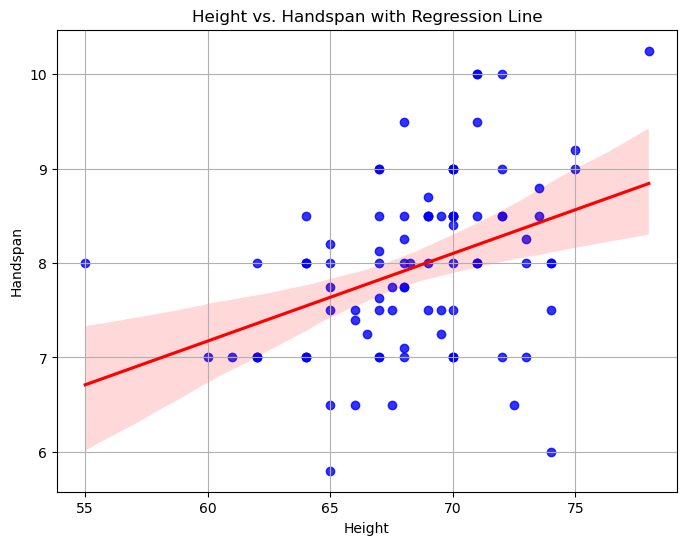

In [59]:
# Answer
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.regplot(x='height', y='handspan', data=filtered_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Height vs. Handspan with Regression Line')
plt.xlabel('Height')
plt.ylabel('Handspan')
plt.grid(True)
plt.show()

### Problem 5: (3 points)

<span  style="color:purple; font-size:16px">Using the `regplot` output above, what is the approximate average height of a person with a `handspan` of 6 inches? What is the approximate height of a person with a `handspan` of 10 inches? (Note: you do not need to perform any calculations or write any code to answer this question.)</span>

#### Written Answer

##### Approximate height when handspan 6 inches
74

##### Approximate height when handspan 10 inches
72

### Problem 6: (3 points)

<span  style="color:purple; font-size:16px">Create a scatterplot matrix of `height`, `shoe_size`, and `handspan`. What relationship is the strongest? What relationship is the weakest?</span>

/Users/oohareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


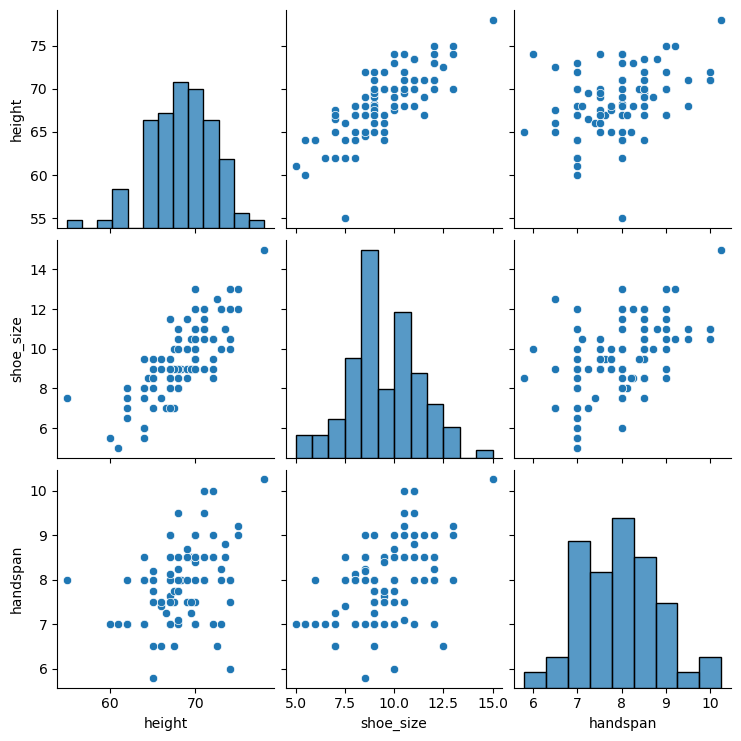

In [8]:
# Answer - create plot
# Select columns for the scatterplot matrix
selected_columns = ['height', 'shoe_size', 'handspan']

# Create scatterplot matrix
sns.pairplot(body_data[selected_columns])
plt.show()


#### Written Answer:
The strongest relationship is likely to be between height and shoe_size.

The weakest relationship may be between shoe size and handspan, as shoe size and hand size are not strongly correlated in most cases.

### Problem 7: (4 points)

<span  style="color:purple; font-size:16px">Great! So far, you have successfully used visualization to locate suspect values and handle them appropriately. But, there are other issues with data. Create a scatterplot matrix of the entire data and determine at least two variables that appear to have suspect values. Make sure to address why the values must be incorrect. (Hint: try using Seaborn's `pairplot()` for a better looking and easier to read plot!)</span>

/Users/oohareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


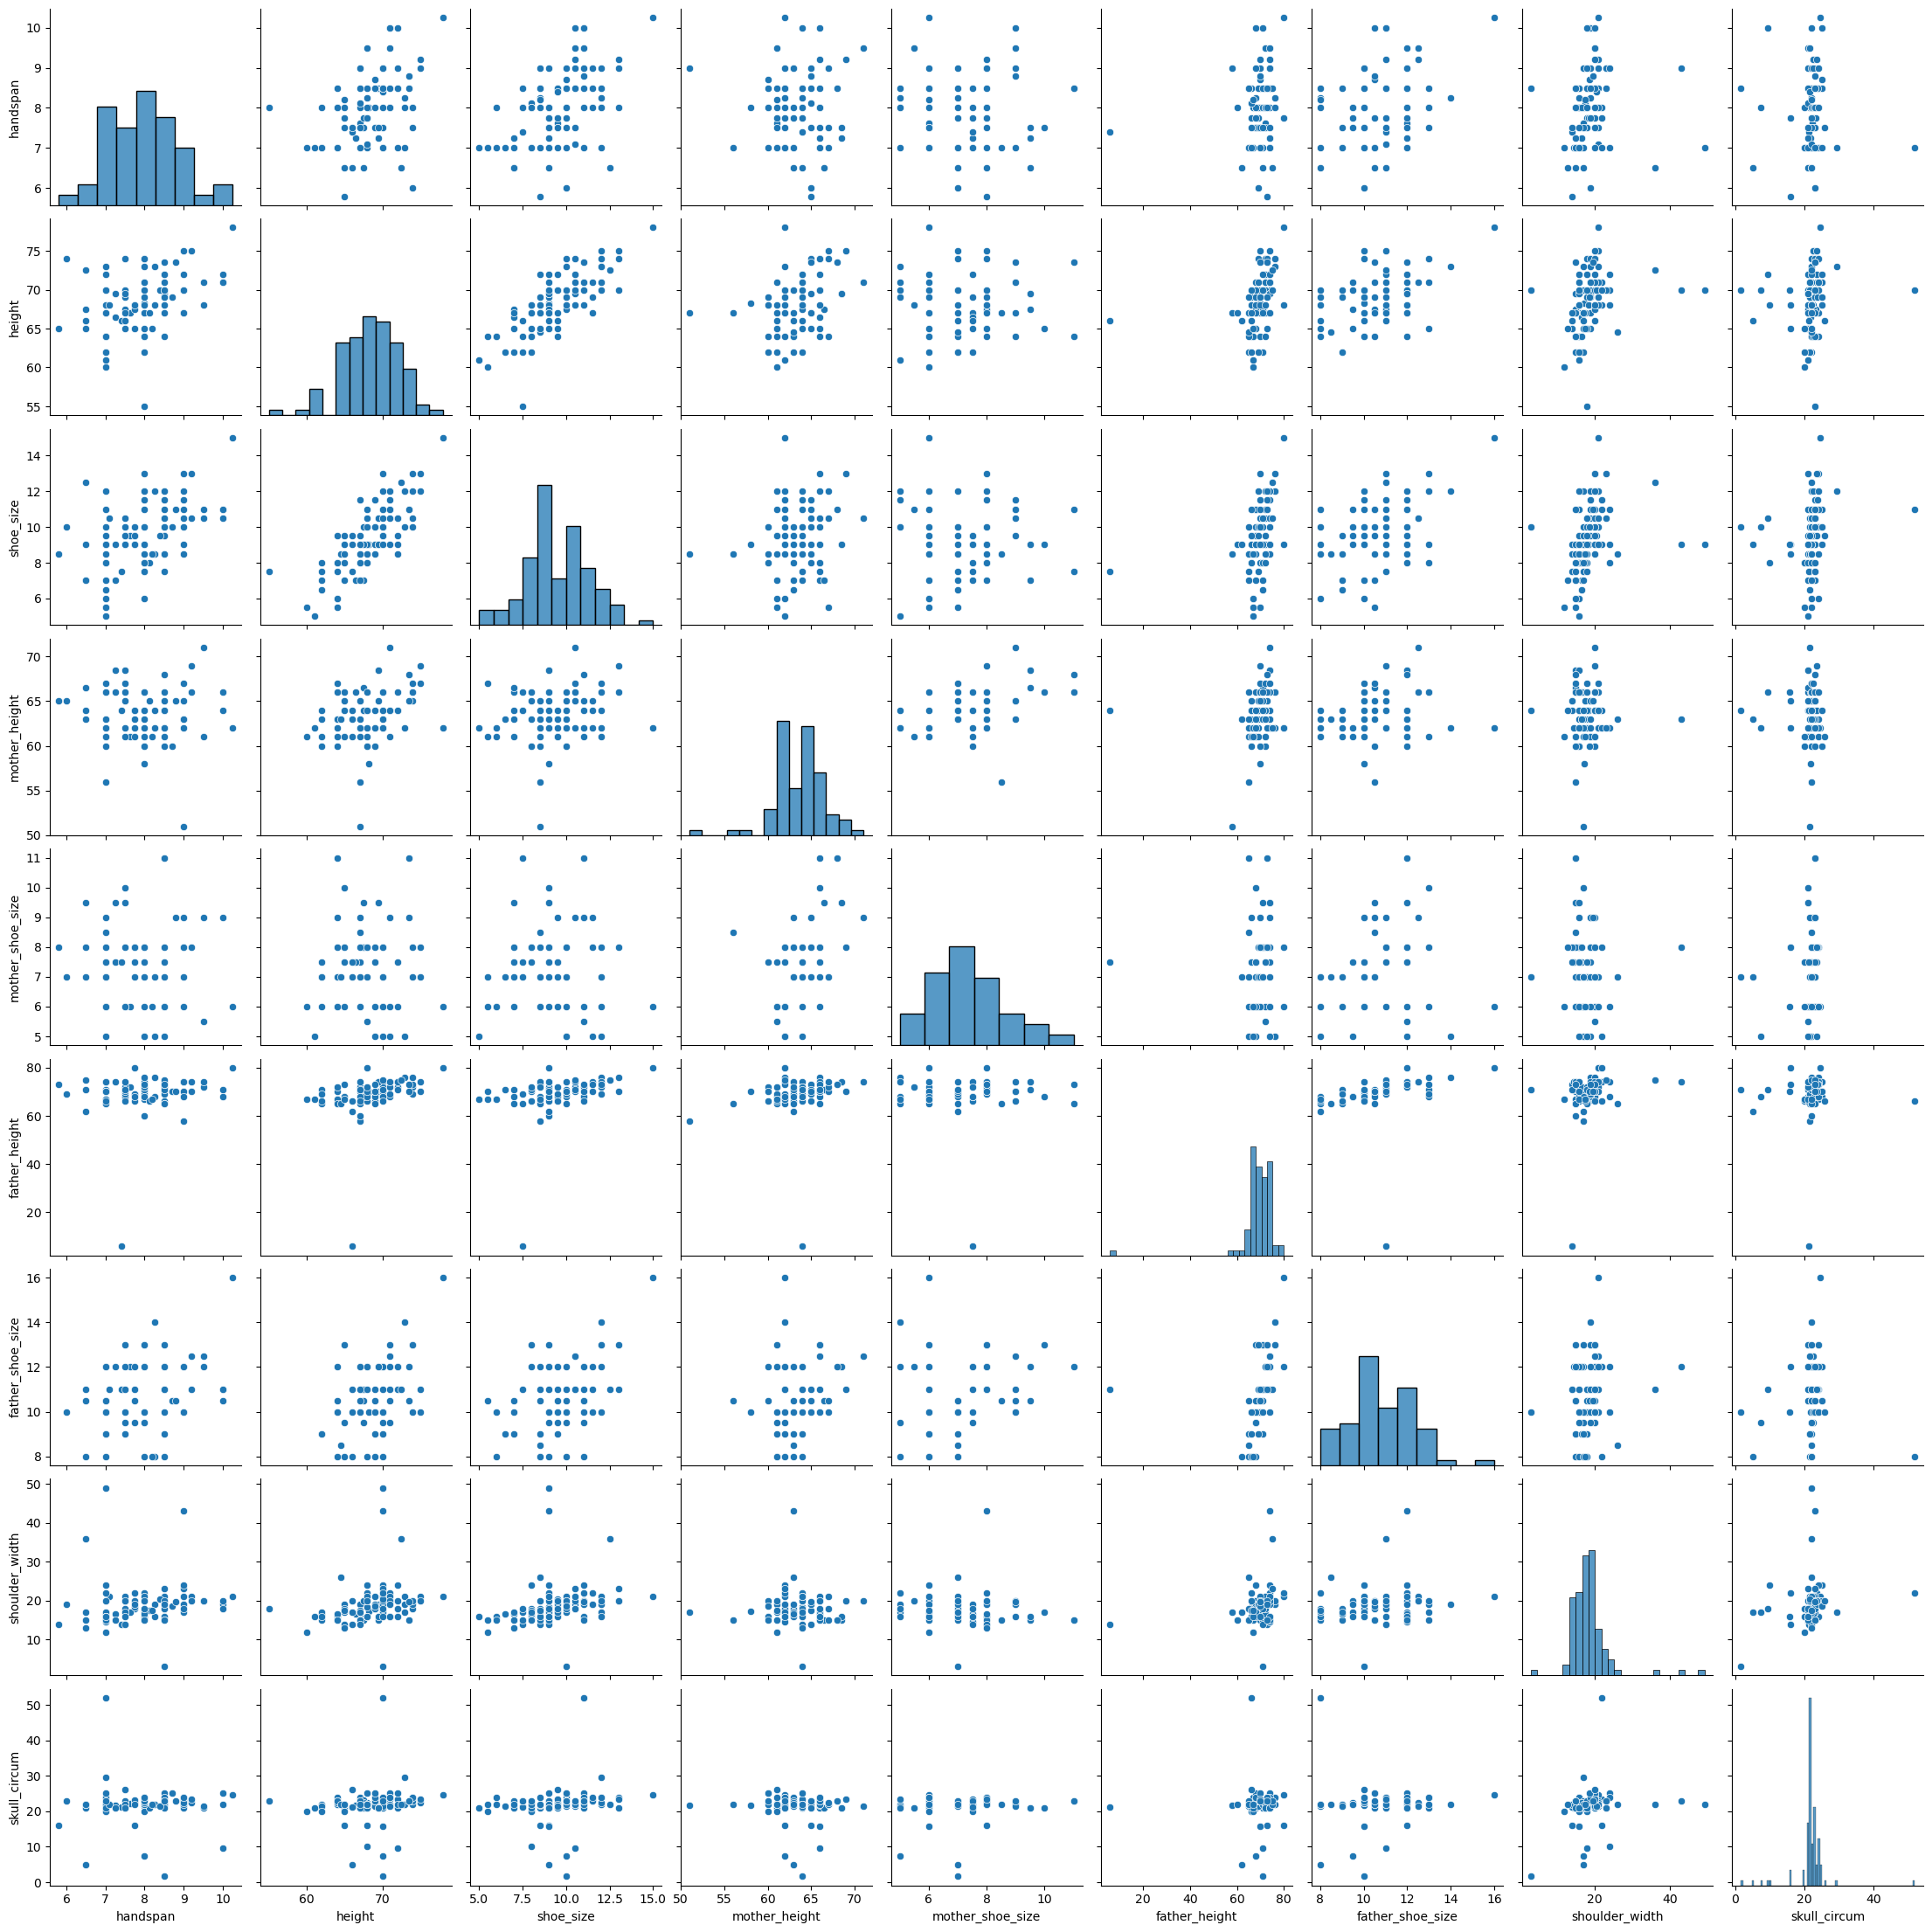

In [61]:
# Answer
import seaborn as sns
# Creating scatterplot matrix
sns.pairplot(body_data)
plt.show()

**Answer:**

Variables with issues: Representation of the variables "mother_shoe_size" and "father_shoe_size" is not informative or visually appealing.

Why you know the values must not be right: When examining the pairplot of the dataset, the relationship between "mother_shoe_size" and "father_shoe_size" appears to be the most negatively correlated compared to other pairs. This suggests that there may be an issue with the accuracy of these variables. 


### Problem 8: (3 points)

<span  style="color:purple; font-size:16px">The survey, when asking information about the respondent's `sex`, allowed for people to respond: *Male*, *Female*, or *Prefer not to say*. How many observations were there for each level of `sex`?</span>

sex
Male                 70
Female               27
Prefer not to say     1
Name: count, dtype: int64


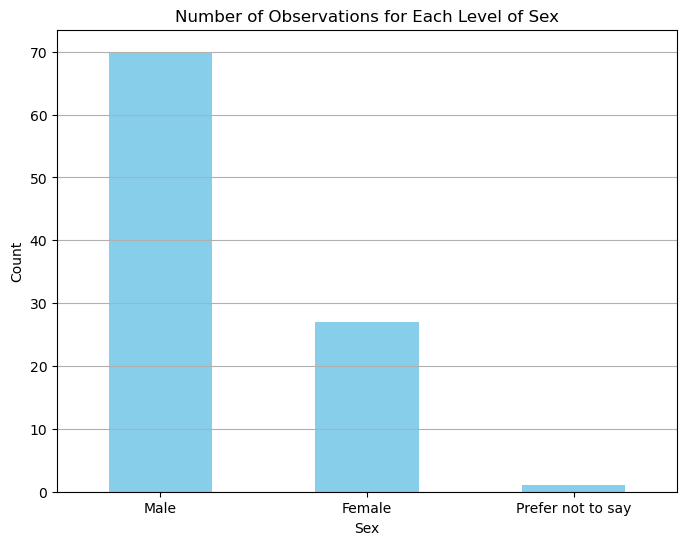

In [62]:
# Answer
# Counting the observations for each level of sex
sex_counts = body_data['sex'].value_counts()

print(sex_counts)

# Creating a bar plot
plt.figure(figsize=(8, 6))
sex_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Observations for Each Level of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.grid(axis='y')
plt.show()

### Problem 9: (5 points)

<span  style="color:purple; font-size:16px">Because there are very few who `prefer not to say`, permanently remove them from the data using the `drop(index = XXXX)` method. Take appropriate steps to verify that these observations have been removed.</span>

In [63]:
# Answer
# Finding the indices of observations where sex is "Prefer not to say"
drop_ind = body_data[body_data['sex'] == 'Prefer not to say'].index

# Droping these observations permanently
body_data.drop(index= drop_ind, inplace=True)

# Verify that observations have been removed
print(body_data['sex'].value_counts())

sex
Male      70
Female    27
Name: count, dtype: int64


### Problem 10: (5 points)

<span  style="color:purple; font-size:16px">Create a DataFrame called `avg_heights` containing 3 columns, 1.) the average `height` (by `sex` and `shoe_size`), 2.)`sex`, and 3.) `shoe_size`. Print out the DataFrame. (Hint: use `groupby()` and deal with the index appropriately.)</span>

In [12]:
# Answer
# Group by sex and shoe_size, calculate average height
avg_heights = body_data.groupby(['sex', 'shoe_size'])['height'].mean().reset_index()

# Print out the DataFrame
print(avg_heights)

       sex  shoe_size     height
0   Female        5.5  62.000000
1   Female        6.0  64.000000
2   Female        6.5  62.000000
3   Female        7.0  65.250000
4   Female        7.5  61.750000
5   Female        8.0  64.666667
6   Female        8.5  67.125000
7   Female        9.0  67.600000
8   Female        9.5  64.000000
9   Female       10.0  67.500000
10    Male        7.0  67.000000
11    Male        8.0  66.200000
12    Male        8.5  67.333333
13    Male        9.0  68.977273
14    Male        9.5  68.571429
15    Male       10.0  70.200000
16    Male       10.5  70.928571
17    Male       11.0  71.000000
18    Male       11.5  69.000000
19    Male       12.0  72.428571
20    Male       12.5  72.500000
21    Male       13.0  72.500000
22    Male       15.0  78.000000


### Problem 11: (5 points)

<span  style="color:purple; font-size:16px">Create a plot using Seaborn's `pairplot()` on the `avg_heights` data, setting the `hue = sex`. Describe what you see.</span>

/Users/oohareddy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


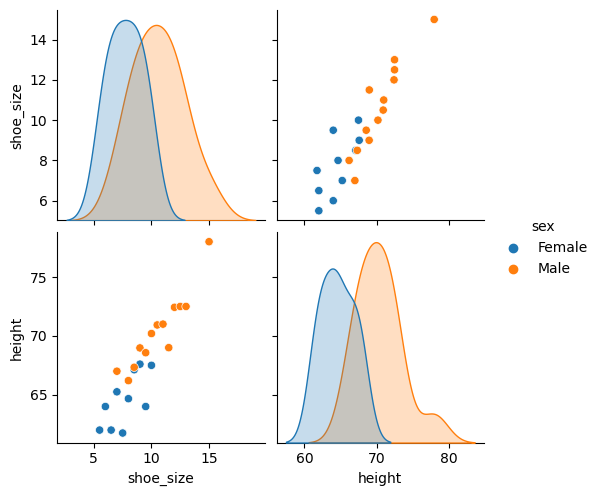

In [64]:
# Answer
# Creating pairplot with hue = sex
sns.pairplot(avg_heights, hue='sex')
plt.show()

#### Written Answer
The male shoe sizes tend to be higher compared to the female shoe sizes in the dataset.

In the dataset, I observe that individuals who have taller heights tend to have larger shoe sizes. This suggests a weak positive correlation between shoe size and height, indicating that taller people are more likely to wear larger shoes.

### Problem 12: (5 points)

<span  style="color:purple; font-size:16px">Use the plot to determine a reasonable rule for defining a cutoff for `height` and `shoe_size` that might be useful in determining if an individual is male or female. Can your rules perfectly predict `sex` based on `height` and `shoe_size`? (Example: If `height` is less than XXX and `shoe_size is less than XXX then I would predict the individual to be XXX. Answers may vary.)</span>

#### Written Answer
If we observe that there is a clear separation between male and female data points in the scatterplot, we can establish cutoff values based on these clusters.

We might find that males tend to have taller heights and larger shoe sizes compared to females, so we can define cutoff values accordingly.

There can be significant overlap in the distributions of height and shoe size between males and females, making it challenging to establish precise cutoff values.

If height is greater than 170 cm and shoe size is greater than 9 (for example), the individual is more likely to be male.

If height is less than 160 cm and shoe size is less than 7 (for example), the individual is more likely to be female.

Additionally, it's important to recognize that sex is a complex and multifaceted characteristic that cannot be accurately predicted solely based on height and shoe size. 

### Problem 13: (5 points)

<span  style="color:purple; font-size:16px">Use `pivot_table()` with the `body_data` to create a DataFrame with `shoe_size` as the index, `sex` as the columns, and the `height` as the values with `mean` as the aggregation function.</span>

In [65]:
# Answer
# Creating pivot table
pivot = pd.pivot_table(body_data, values='height', index='shoe_size', columns='sex', aggfunc='mean')

# Printing the pivot table DataFrame
print(pivot)

sex           Female       Male
shoe_size                      
5.5        62.000000        NaN
6.0        64.000000        NaN
6.5        62.000000        NaN
7.0        65.250000  67.000000
7.5        61.750000        NaN
8.0        64.666667  66.200000
8.5        67.125000  67.333333
9.0        67.600000  68.977273
9.5        64.000000  68.571429
10.0       67.500000  70.200000
10.5             NaN  70.928571
11.0             NaN  71.000000
11.5             NaN  69.000000
12.0             NaN  72.428571
12.5             NaN  72.500000
13.0             NaN  72.500000
15.0             NaN  78.000000


#### Written Answer
Each row represents a unique shoe size.
Each column represents a sex (male or female).
The values are the mean height corresponding to each combination of shoe size and sex.

When there are NaN values in the table, it indicates that there were no observations recorded for that particular combination of shoe size and sex.

The pivot table summarizes the average heights for males and females across different shoe sizes, allowing us to observe trends in height distribution within each gender category.

### Problem 14: (5 points)

<span  style="color:purple; font-size:16px">Create one overlapping density plot of `height` by `sex` and `athlete`. (Hint: use `groupby()` on both grouping variables.) Make sure to include a legend. Describe the relationship between `sex`, `athlete`, and `height`. How does your interpretation relate to your answers to the previous few problems?</span>

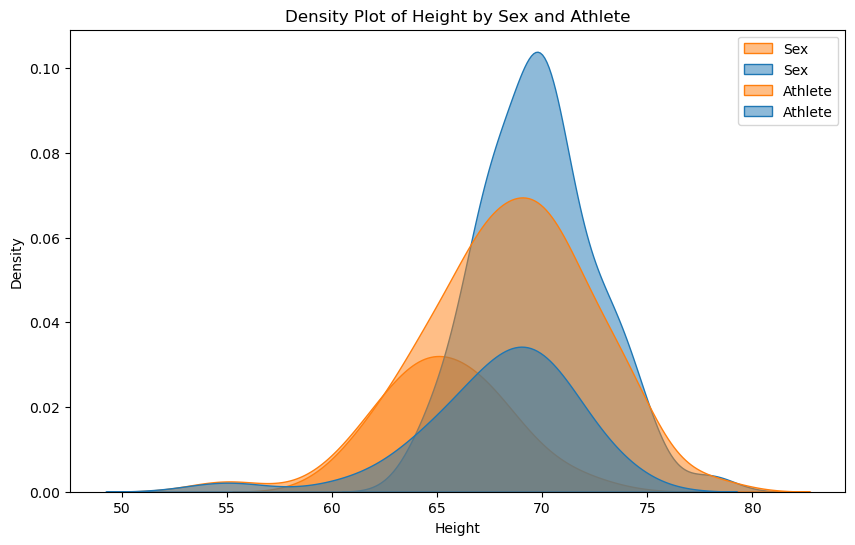

In [66]:
# Answer
# Creating an overlapping density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=body_data, x='height', hue='sex', fill=True, alpha=0.5, label='Sex')
sns.kdeplot(data=body_data, x='height', hue='athlete', fill=True, alpha=0.5, label='Athlete')
plt.title('Density Plot of Height by Sex and Athlete')
plt.xlabel('Height')
plt.ylabel('Density')
plt.legend()
plt.show()

#### Written Answer
The density plot illustrates the distribution of heights for males and females separately, as well as for athletes and non-athletes.

From the plot, we can observe how the distribution of heights varies between males and females, with potential differences in the central tendency and spread of the distributions.

The plot allows us to compare the distribution of heights between athletes and non-athletes within each gender category.

The interpretation of the relationship between sex, athlete status, and height from this plot can complement the analysis conducted in the previous problems, providing visual insights into how these variables are distributed and potentially correlated within the dataset.

### Problem 15: (5 points)

<span  style="color:purple; font-size:16px">Determine if there are missing values in the data. If so, in what columns? How many missing values are there?</span>

In [67]:
# Answer
# Checking for missing values
missing_values = body_data.isnull().sum()

# Printing columns with missing values and the corresponding number of missing values
print(missing_values)

timestamp             0
sex                   4
handspan              6
height                3
shoe_size             0
hair_color            0
mother_height        22
mother_shoe_size     38
mother_hair_color     0
father_height        18
father_shoe_size     31
father_hair_color     0
athlete               0
shoulder_width        0
skull_circum          0
dtype: int64


Missing values are 122

### Problem 16: (5 points)

<span  style="color:purple; font-size:16px">There appears to be some missing values in the `sex` column. We want to impute values for these missing observations. Using the `height` for each of the individuals, determine the probability that the person was male or female. This question works in conjunction with an earlier problem, so refer to the visualization you created there for guidance.</span>

+ Extract the data corresponding to each of the missing values of `sex`. 
+ Calculate the proportion of Males and Females taller than or equal to each of heights of the missing observations

Determine proportion of Males and Females with heights above ___.

In [68]:
# Step 1: Extract data corresponding to missing values of 'sex'
missing_sex_data = body_data[body_data['sex'].isnull()]

# Step 2: Calculate proportions of males and females taller than or equal to each height value
total_male = len(body_data[body_data['sex'] == 'Male'])
total_female = len(body_data[body_data['sex'] == 'Female'])

proportions = []
for height in missing_sex_data['height']:
    male_count = len(body_data[(body_data['sex'] == 'Male') & (body_data['height'] >= height)])
    female_count = len(body_data[(body_data['sex'] == 'Female') & (body_data['height'] >= height)])
    proportion_male = male_count / total_male
    proportion_female = female_count / total_female
    proportions.append((proportion_male, proportion_female))

# Step 3: Assign missing 'sex' values based on calculated proportions
imputed_sex = []
for proportion in proportions:
    if proportion[0] > proportion[1]:
        imputed_sex.append('Male')
    else:
        imputed_sex.append('Female')

# Update missing_sex_data with imputed 'sex' values
missing_sex_data['sex'] = imputed_sex

# Display the imputed 'sex' values
print(missing_sex_data[['height', 'sex']])


    height   sex
4     71.0  Male
10    64.0  Male
18    74.0  Male
73    61.0  Male


/var/folders/4l/x_mdb3lx0s128r9lgh761j940000gn/T/ipykernel_11220/3435038786.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_sex_data['sex'] = imputed_sex


In [91]:
def taller(body_data, height):
    # Count males taller than height
    m_tall = body_data[(body_data['sex'] == 'Male') & (body_data['height'] >= height)].shape[0]
    
    # Count females taller than height
    f_tall = body_data[(body_data['sex'] == 'Female') & (body_data['height'] >= height)].shape[0]
    
    # Count total non-null entries
    total = body_data.shape[0] - body_data['sex'].isna().sum()
    
    # Calculate proportions
    prop_male = m_tall / total
    prop_female = f_tall / total
    
    return prop_male, prop_female

# Define heights to check
heights = [71, 64, 74.0, 61.0]

# Calculate proportions for each height
for height in heights:
    prop_male, prop_female = taller(body_data.loc[~body_data['height'].isna()], height)
    print(f"For height {height}, proportion of males: {prop_male}, proportion of females: {prop_female}")



For height 71, proportion of males: 0.24210526315789474, proportion of females: 0.010526315789473684
For height 64, proportion of males: 0.7157894736842105, proportion of females: 0.21052631578947367
For height 74.0, proportion of males: 0.06315789473684211, proportion of females: 0.0
For height 61.0, proportion of males: 0.7157894736842105, proportion of females: 0.25263157894736843


Determine proportion of Males and Females with heights below ___.

In [92]:
def lower(body_data, height):
    # Count males shorter than or equal to height
    m_short = body_data[(body_data['sex'] == 'Male') & (body_data['height'] <= height)].shape[0]
    
    # Count females shorter than or equal to height
    f_short = body_data[(body_data['sex'] == 'Female') & (body_data['height'] <= height)].shape[0]
    
    # Count total non-null entries
    total = body_data.shape[0] - body_data['sex'].isna().sum()
    
    # Calculate proportions
    prop_male = m_short / total
    prop_female = f_short / total
    
    return prop_male, prop_female

# Define heights to check
heights = [71, 64, 74.0, 61.0]

# Calculate proportions for each height
for height in heights:
    prop_male, prop_female = lower(body_data.loc[~body_data['height'].isna()], height)
    print(f"For height {height}, proportion of males: {prop_male}, proportion of females: {prop_female}")


For height 71, proportion of males: 0.5473684210526316, proportion of females: 0.2631578947368421
For height 64, proportion of males: 0.010526315789473684, proportion of females: 0.11578947368421053
For height 74.0, proportion of males: 0.6842105263157895, proportion of females: 0.2736842105263158
For height 61.0, proportion of males: 0.0, proportion of females: 0.021052631578947368


### Problem 17: (5 points)

<span  style="color:purple; font-size:16px">Based on what you learned from the last exercise, impute the missing values of `sex`.</span>

In [113]:
# Answer 
#Create filter and impute for male bodies
male_filter = (body_data['sex'].isnull()) & (body_data['height'] >= 61)

# Impute Missing Values
body_data.loc[male_filter, 'sex'] = 'Male'
print(body_data)
missing_values = body_data['sex'].isna().sum()
print("Number of missing values in 'sex' column:", missing_values)

                        sex  handspan  height  shoe_size hair_color  \
timestamp                                                             
2018-09-20 12:21:00    Male      7.75     NaN        9.5      Black   
2018-09-20 18:43:00    Male      8.50   67.00        8.5     Blonde   
2018-09-20 18:53:00  Female      7.00   62.00        7.0      Black   
2018-09-20 20:13:00    Male      8.00   68.25        9.0      Brown   
2018-09-20 20:31:00  Female     10.00   71.00       11.0      Black   
...                     ...       ...     ...        ...        ...   
2018-09-24 19:20:00    Male      7.50   66.00        9.5      Brown   
2018-09-24 23:13:00    Male      9.20   75.00       13.0      Brown   
2018-09-25 09:22:00    Male      8.80   73.50       11.0      Black   
2018-09-25 10:51:00    Male      8.20   65.00        8.5      Black   
2018-09-25 12:54:00    Male      8.50   73.50       11.0      Black   

                     mother_height  mother_shoe_size mother_hair_color  \
ti

In [109]:
# Answer - 
#Create filter and impute for female bodies
female_filter = (body_data['sex'].isnull()) & (body_data['height'] >= 61)

# Impute Missing Values
body_data.loc[female_filter, 'sex'] = 'Female'
print(body_data)

                        sex  handspan  height  shoe_size hair_color  \
timestamp                                                             
2018-09-20 12:21:00    Male      7.75     NaN        9.5      Black   
2018-09-20 18:43:00    Male      8.50   67.00        8.5     Blonde   
2018-09-20 18:53:00  Female      7.00   62.00        7.0      Black   
2018-09-20 20:13:00    Male      8.00   68.25        9.0      Brown   
2018-09-20 20:31:00  Female     10.00   71.00       11.0      Black   
...                     ...       ...     ...        ...        ...   
2018-09-24 19:20:00    Male      7.50   66.00        9.5      Brown   
2018-09-24 23:13:00    Male      9.20   75.00       13.0      Brown   
2018-09-25 09:22:00    Male      8.80   73.50       11.0      Black   
2018-09-25 10:51:00    Male      8.20   65.00        8.5      Black   
2018-09-25 12:54:00    Male      8.50   73.50       11.0      Black   

                     mother_height  mother_shoe_size mother_hair_color  \
ti

In [110]:
# Answer - Verify success by checking for missing values of sex
missing_values = body_data['sex'].isna().sum()
print("Number of missing values in 'sex' column:", missing_values)

Number of missing values in 'sex' column: 0


### Problem 18: (5 points)

<span  style="color:purple; font-size:16px">Plot a time-series plot of the responses by `timestamp` by calling the `plot()` method on the `timestamp` column extracted as a Series. Provide a suitable title and make the plot large. Interpret what you are seeing in the plot. How do you explain the stair-step shape? (Hint: The index will be displayed on the x-axis and the timestamp on the y-axis)</span>

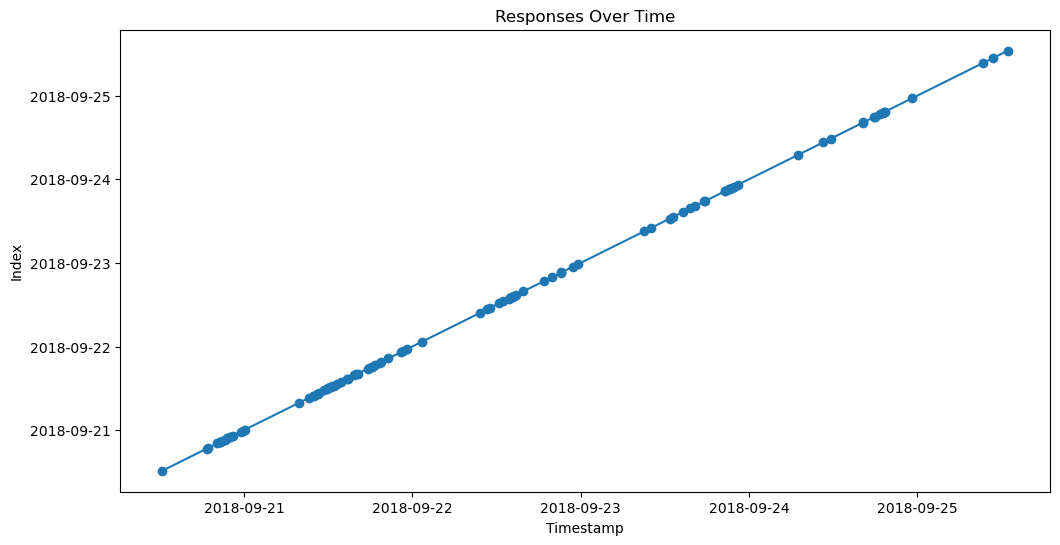

In [36]:
# Answer
# Convert 'timestamp' column to datetime format
body_data['timestamp'] = pd.to_datetime(body_data['timestamp'])

# Set 'timestamp' column as index
body_data.set_index('timestamp', inplace=True)

# Plot time-series
plt.figure(figsize=(12, 6))  # Adjust figure size
plt.plot(body_data.index, body_data.index, marker='o', linestyle='-')
plt.title('Responses Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Index')
plt.show()

#### Written Answer
The time-series plot shows the trend of responses over time.

The stair-step shape suggests that there are distinct periods of time with relatively consistent response rates, followed by sudden changes.

The horizontal sections indicate periods where no responses were recorded, while the vertical sections indicate spikes in responses.

The stair-step shape could be due to periodic data collection, such as daily or weekly surveys, resulting in distinct time intervals with responses.

Sudden changes in response rates may be attributed to external factors changes in survey distribution methods.
Overall, the plot provides insight into the temporal patterns of responses and can help identify trends and anomalies in the data collection process over time.

### Problem 19: (5 points)

<span  style="color:purple; font-size:16px">Determine the days of the week of the responses as recorded by the `timestamp` and save these values as a new column in the data called `DOW`.</span>

In [85]:
# Answer
# Convert 'timestamp' column to datetime format
body_data['timestamp'] = pd.to_datetime(body_data['timestamp'])

# Extract the day of the week (DOW) from the timestamp
body_data['DOW'] = body_data['timestamp'].dt.dayofweek

# Map numerical values to corresponding day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
body_data['DOW'] = body_data['DOW'].map(lambda x: day_names[x])

# Display the updated DataFrame with the 'DOW' column
print(body_data)

              timestamp     sex  handspan  height  shoe_size hair_color  \
0   2018-09-20 12:21:00    Male      7.75     NaN        9.5      Black   
1   2018-09-20 18:43:00    Male      8.50   67.00        8.5     Blonde   
2   2018-09-20 18:53:00  Female      7.00   62.00        7.0      Black   
3   2018-09-20 20:13:00    Male      8.00   68.25        9.0      Brown   
4   2018-09-20 20:31:00     NaN     10.00   71.00       11.0      Black   
..                  ...     ...       ...     ...        ...        ...   
97  2018-09-24 19:20:00    Male      7.50   66.00        9.5      Brown   
98  2018-09-24 23:13:00    Male      9.20   75.00       13.0      Brown   
99  2018-09-25 09:22:00    Male      8.80   73.50       11.0      Black   
100 2018-09-25 10:51:00    Male      8.20   65.00        8.5      Black   
101 2018-09-25 12:54:00    Male      8.50   73.50       11.0      Black   

     mother_height  mother_shoe_size mother_hair_color  father_height  \
0             63.0        

#### Written Answer
The day of the week will be represented as an integer, where Monday is 0 and Sunday is 6.

### Problem 20: (5 points)

<span  style="color:purple; font-size:16px">Create a visualization showing the number of survey submissions by the day of the week. What day had the most submissions? The least number of submissions?</span>

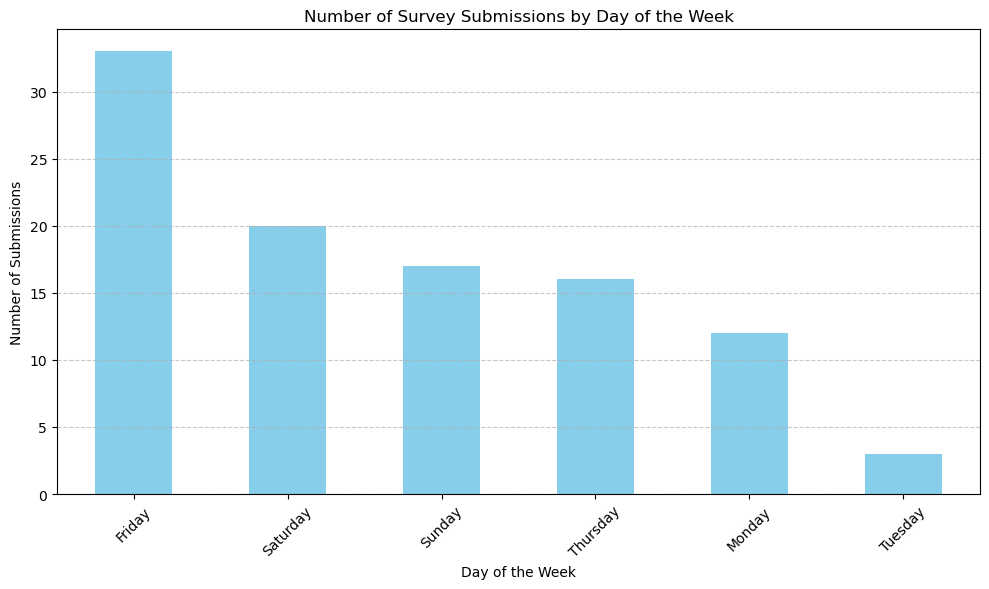

In [82]:
# Answer
# Counting the number of submissions by day of the week
submissions_by_day = body_data['DOW'].value_counts()

# Plot the number of submissions by day of the week
plt.figure(figsize=(10, 6))
submissions_by_day.plot(kind='bar', color='skyblue')
plt.title('Number of Survey Submissions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Submissions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [79]:
# Determine the day with the most submissions
most_submissions_day = submissions_by_day.idxmax()
most_submissions_count = submissions_by_day.max()

# Determine the day with the least submissions
least_submissions_day = submissions_by_day.idxmin()
least_submissions_count = submissions_by_day.min()

print(f"Day with the most submissions: {most_submissions_day} ({most_submissions_count} submissions)")
print(f"Day with the least submissions: {least_submissions_day} ({least_submissions_count} submissions)")

Day with the most submissions: Friday (33 submissions)
Day with the least submissions: Tuesday (3 submissions)


#### Written Answer
Most submissions day is on Friday - 34

Least submissions day is on Tuesday - 3

### Problem 21: (5 points)

<span  style="color:purple; font-size:16px">Set the `timestamp` column to be the index. Use the `resample()` method to aggregate the data in 3 hour intervals. Use the `agg()` function to apply the `count` method to the `sex` column. Finally, plot the time-series so we can visualize the number of responses submitted over each 3 hour interval. Describe any pattern that you see in the data.</span>

(Hint: After setting timestamp to be the index, use code like: `data.resample(<stuff>).agg(<stuff>).plot(<stuff>)`)

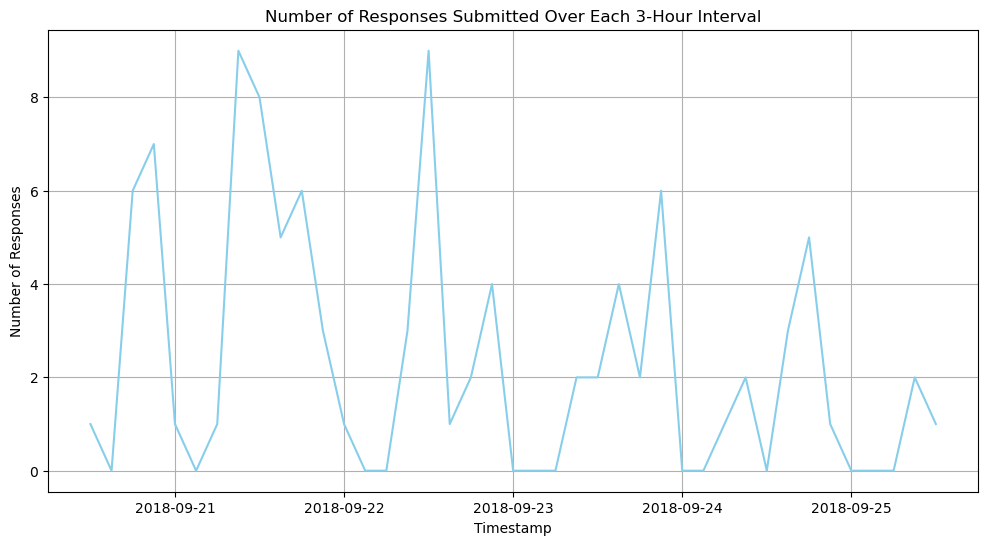

In [86]:
# Converting 'timestamp' column to datetime type and set it as the index
body_data['timestamp'] = pd.to_datetime(body_data['timestamp'])
body_data.set_index('timestamp', inplace=True)

# Resampling data in 3-hour intervals and aggregate
resampled_counts = body_data['sex'].resample('3H').agg('count')

# Plot the time-series
plt.figure(figsize=(12, 6))
plt.plot(resampled_counts, color='skyblue')
plt.title('Number of Responses Submitted Over Each 3-Hour Interval')
plt.xlabel('Timestamp')
plt.ylabel('Number of Responses')
plt.grid(True)
plt.show()

#### Written Answer
The data suggests that the highest number of submissions occurred on September 21 and 23. Notably, in submissions aligns with the weekend, particularly Saturday. 

### Problem 22: (5 points)

<span  style="color:purple; font-size:16px">Use the time index to extract all survey submissions on Sept 25. How many submissions were made on that day?</span>

In [88]:
# Answer
sub_25 = body_data[body_data.index.date == pd.to_datetime('2018-09-25').date()]
n = len(survey)
print("Submissions on that day are", n)

Submissions on that day are 3


#### Written Answer
Submissions on 2018-09-25 are 3

### Problem 23: (5 points)

<span  style="color:purple; font-size:16px">Use the time index to extract all survey submissions between 10AM and 2PM on September 21. How many submissions were made during that time?</span>

In [89]:
# Answer
start_time = pd.to_datetime('2018-09-21 10:00:00')
end_time = pd.to_datetime('2018-09-21 14:00:00')

survey_submissions = body_data[(body_data.index >= start_time) & (body_data.index <= end_time)]
num_submissions = len(survey_submissions)

print("Number of submissions between 10 AM and 2 PM on September 21:", num_submissions)


Number of submissions between 10 AM and 2 PM on September 21: 13


#### Written Answer
The submissions between 10 am and 2 pm on sep 21 is 13.